# 프로젝트 1: Boston 주택 가격 예측 모델

### 데이터 로드 및 전처리

In [1]:
# 필요 패키지(라이브러리) import

In [2]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
# keras.datasets 안에 있는 boston_housing 데이터셋 로드

In [4]:
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [5]:
# 데이터셋 크기 확인

In [6]:
print(len(train_data))
print(len(test_data))

404
102


In [7]:
# 데이터셋의 전처리를 위한 표준화 작업 수행

In [8]:
# 1) 입력 데이터의 각 특성의 평균 빼기

In [9]:
mean = train_data.mean(axis=0)

train_data = train_data - mean

In [10]:
# 2) 평균을 뺀 입력 데이터를 표준편차로 나누기
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.

In [11]:
std = train_data.std(axis=0)

train_data = train_data / std

In [12]:
# 테스트 데이터셋도 동일하게 표준화 작업 수행

In [13]:
test_data = test_data - mean
test_data = test_data / std

### 모델 구성 및 컴파일

In [14]:
# 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일
# Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성

In [15]:
# 1) 모델 구성 (Sequential API 방법)

In [16]:
# input_shape은 (train_data.shape[1], )으로 구성합니다.
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

In [17]:
# 2) 컴파일

In [18]:
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

### 모델 학습

In [19]:
# epochs와 batch size는 자유롭게 설정하고, 
# 모델 학습 후에는 모델 학습 결과를 시각화하세요.

In [20]:
# 예측을 위한 딥러닝 모델 학습

In [21]:
history = model.fit(train_data, train_labels, 
                    epochs=60, batch_size = 10,
                    validation_split=0.2)

Epoch 1/60
33/33 [==============================] - 1s 7ms/step - loss: 524.7764 - mae: 20.9512 - val_loss: 547.4035 - val_mae: 21.4537
Epoch 2/60
33/33 [==============================] - 0s 3ms/step - loss: 407.3758 - mae: 18.0743 - val_loss: 391.6682 - val_mae: 17.5669
Epoch 3/60
33/33 [==============================] - 0s 3ms/step - loss: 232.7922 - mae: 12.9551 - val_loss: 194.6477 - val_mae: 10.9007
Epoch 4/60
33/33 [==============================] - 0s 3ms/step - loss: 99.2692 - mae: 7.3870 - val_loss: 101.9579 - val_mae: 7.4605
Epoch 5/60
33/33 [==============================] - 0s 3ms/step - loss: 59.6217 - mae: 5.6243 - val_loss: 67.9150 - val_mae: 5.9922
Epoch 6/60
33/33 [==============================] - 0s 3ms/step - loss: 42.0137 - mae: 4.5196 - val_loss: 47.6457 - val_mae: 4.9967
Epoch 7/60
33/33 [==============================] - 0s 3ms/step - loss: 31.9849 - mae: 3.8937 - val_loss: 36.7296 - val_mae: 4.4110
Epoch 8/60
33/33 [==============================] - 0s 3ms/step

In [22]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.

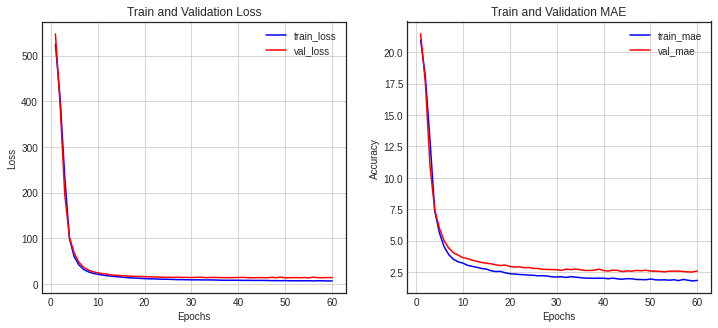

In [23]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

In [24]:
# 테스트 데이터를 이용해 모델 성능을 평가하기

In [25]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 22.8370 - mae: 2.9332


[22.83696746826172, 2.9331555366516113]